Importing the libraries


In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt 

Importing the file and showing the first lines

In [4]:
file = 'C:/Users/ANDRAE15/Desktop/Dry_pan Projetc/2 Experiment/run29_th.csv'

run_th = pd.read_csv(file)
run_th.head(5)


,Seconds,Minutes,TMP.Values.AC_A,TMP.Values.AC_B,TMP.Values.COIL_A,TMP.Values.COIL_B,DER.Requested_Power.A,DER.Requested_Power.B
0,0.000,0.000000,-1.000000,-1.0,-1.000000,-1.000000,-1,-1
1,0.000,0.000000,29.486412,-10.0,29.486412,28.906469,1250,0
2,0.005,0.000083,29.486412,-10.0,29.486412,28.906469,1250,0
3,0.010,0.000167,29.486412,-10.0,29.486412,28.906469,1250,0
4,0.015,0.000250,29.486412,-10.0,29.486412,28.906469,1250,0


Importing the power measured (Power_rms)

854
1257.9410833278353
8.540000000000001


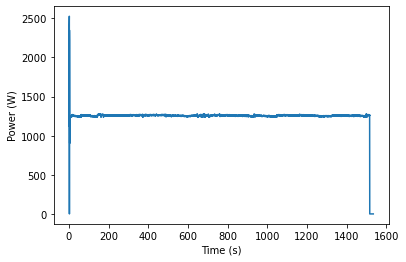

,Seconds,Power
15341,1534.1,0
15342,1534.2,0
15343,1534.3,0
15344,1534.4,0
15345,1534.5,0


In [5]:
file = 'C:/Users/ANDRAE15/Desktop/Dry_pan Projetc/2 Experiment/run29_hw.csv'

run_hw = pd.read_csv(file)
run_hw.head()

HwData = pd.DataFrame(columns = ['Seconds', 'Power'])
moment =0

for istart in run_hw.index:
    if run_hw['Power_Rms.A'][istart] > 0:
       break
print(istart)    
#creating an empty dataframe

sum_power = 0
count_power = 0


for i in range(istart, len(run_hw.index), 10):
    #Dataframe recives the iteration values
    DataIteration = pd.DataFrame({'Seconds': moment,'Power': run_hw['Power_Rms.A'][i]}, index=[i])
    #The iteration is added to the Actual dataframe
    HwData = pd.concat([HwData, DataIteration])
    moment = moment + 0.01*10
    if run_hw['Power_Rms.A'][i] > 0:
        sum_power = sum_power + run_hw['Power_Rms.A'][i]
        count_power = count_power + 1
    
mean_Power = sum_power/count_power

print(mean_Power)
    
HwData.to_csv("C:/Users/ANDRAE15/Desktop/Dry_pan Projetc/2 Experiment/Data/Run29PowerEstimated.csv", index=False)    
    
HwData.reset_index(inplace=True, drop=True)

time = istart*0.01
print(time)

plt.plot(HwData['Seconds'], HwData['Power'])
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.savefig('C:/Users/ANDRAE15/Desktop/Dry_pan Projetc/2 Experiment/Data/run29Power.jpeg', format='jpeg', dpi=300)
plt.show()

HwData.tail()

#run_hw['Seconds'][istart]


Identifying the moment where the pan started to be heated and creating a new Dataframe from this moment


In [6]:

#creating an empty dataframe
ThermalData = pd.DataFrame(columns = ['Seconds', 'Coil Temp', 'Gap Temp', 'Requested Power'])
moment =0
ThermalData.head()

istart_ther = istart*2+1

for i in range(istart_ther, len(run_th.index), 10):
    #Dataframe recives the iteration values
    DataIteration = pd.DataFrame({'Seconds': moment,'Coil Temp': run_th['TMP.Values.AC_A'][i], 'Gap Temp': run_th['TMP.Values.COIL_A'][i], 'Requested Power': run_th['DER.Requested_Power.A'][i]}, index=[i])
    #The iteration is added to the Actual dataframe
    ThermalData = pd.concat([ThermalData, DataIteration])
    moment = moment + 0.005*10
    

ThermalData.reset_index(inplace=True, drop=True)
ThermalData.tail()

#run_th['Seconds'][istart_ther]


,Seconds,Coil Temp,Gap Temp,Requested Power
30799,1539.95,260.723785,260.452637,0
30800,1540.0,260.723785,260.452637,0
30801,1540.05,260.723785,260.452637,0
30802,1540.1,260.723785,260.452637,0
30803,1540.15,260.723785,260.452637,0


Importing the file with the thermocouples measurements

In [7]:
fileMeasurement = 'C:/Users/ANDRAE15/Desktop/Dry_pan Projetc/2 Experiment/Run29_Thermocouples.xlsx'


Measu = pd.read_excel(fileMeasurement, header=0) #load the file starting with the row where he have the measurements

#Measu =Measu.drop([0]) #drop the first row which is empty

Measu.head()

,Ch,CH001,CH002,CH003,CH004,CH005,CH006
0,2022/09/15 15:19:34_000,26.3,26.0,26.2,25.8,-99999,25.9
1,2022/09/15 15:19:36_000,26.3,26.0,26.2,25.8,-99999,25.9
2,2022/09/15 15:19:38_000,26.3,26.0,26.2,25.8,-99999,25.9
3,2022/09/15 15:19:40_000,26.3,26.0,26.2,25.8,-99999,25.9
4,2022/09/15 15:19:42_000,28.2,29.7,29.6,30.2,-99999,26.4


Find the moment where the pan starts to heat

In [8]:
Time = 0;
for i in range(0, len(Measu)):
    if Time > run_th['Seconds'][istart_ther]:
        startHeating = i-1
        break
    Time = Time + 2


   
    
    
print(startHeating)


4


Creating a Dataframe with a medium of the thermocouples starting from the point where the par starts to Heat

In [9]:
Mean_Thermocouple = pd.DataFrame(columns = ['Seconds', 'Temp'])

moment = 0
j = 0

for i in range(startHeating, len(Measu)):
    #Getting the temperature of each termocouple
    cont = 0
    tcl_sum = 0
    tc1 = Measu['CH001'][i]
    tc2 = Measu['CH002'][i]
    tc3 = Measu['CH003'][i]
    tc4 = Measu['CH004'][i]
    tc5 = Measu['CH006'][i]
    
    if tc1 > 0:
        cont = cont + 1
        tcl_sum = tcl_sum + tc1
        
    if tc2 > 0:
        cont = cont + 1
        tcl_sum = tcl_sum + tc2
        
    if tc3 > 0:
        cont = cont + 1
        tcl_sum = tcl_sum + tc3
        
    if tc4 > 0:
        cont = cont + 1
        tcl_sum = tcl_sum + tc4
        
    if tc5 > 0:
        cont = cont + 1
        tcl_sum = tcl_sum + tc5
        
    if cont != 0:    
        mean_tcl = tcl_sum/cont
    
    DataIteration = pd.DataFrame({'Seconds': moment,'Temp': mean_tcl}, index=[j])
    Mean_Thermocouple = pd.concat([Mean_Thermocouple, DataIteration])
    if i != (len(Measu)-1): #This if is to guarantee do not get a counter higher than the dataframe lenght
        moment = 2 + moment #Calculates the moment in seconds of the next iteration. 
        j = j +1
    
Mean_Thermocouple.tail()



,Seconds,Temp
763,1526,336.58
764,1528,334.54
765,1530,332.3
766,1532,330.5
767,1534,327.9


Creating a graphic with the Coil NTC Temperature, Gap NTC Temperature and the Mesuarement temperature

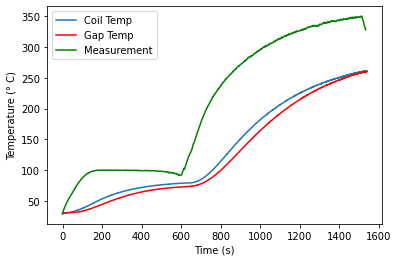

In [10]:
plt.plot(ThermalData['Seconds'], ThermalData['Coil Temp'], label="Coil Temp")
plt.xlabel('Time (s)')
plt.ylabel('Temperature (° C)')
plt.plot(ThermalData['Seconds'], ThermalData['Gap Temp'], color='red', label="Gap Temp")
plt.plot(Mean_Thermocouple['Seconds'], Mean_Thermocouple['Temp'], color='green', label= "Measurement")
plt.legend(loc="upper left")

plt.savefig('C:/Users/ANDRAE15/Desktop/Dry_pan Projetc/2 Experiment/Data/run29.jpeg', format='jpeg', dpi=300)
plt.show()



Create the csv for all the simulation, for testing a maplesim model

In [11]:
Mean_Thermocouple.to_csv("C:/Users/ANDRAE15/Desktop/Dry_pan Projetc/2 Experiment/Data/Measure29.csv", index=False)

CoilNTCAll = pd.DataFrame(columns = ['Seconds', 'Temp'])
GapNTCAll = pd.DataFrame(columns = ['Seconds', 'Temp'])
PowerAll = pd.DataFrame(columns = ['Seconds', 'Power'])

for i in range(0, len(ThermalData)):
        IterationCoil = pd.DataFrame({'Seconds': ThermalData['Seconds'][i],'Temp': ThermalData['Coil Temp'][i]}, index=[i])
        IterationGap = pd.DataFrame({'Seconds': ThermalData['Seconds'][i],'Temp': ThermalData['Gap Temp'][i]}, index=[i])
        IterationPower = pd.DataFrame({'Seconds': ThermalData['Seconds'][i],'Power': ThermalData['Requested Power'][i]}, index=[i])
        CoilNTCAll = pd.concat([CoilNTCAll, IterationCoil])
        GapNTCAll = pd.concat([GapNTCAll, IterationGap])
        PowerAll = pd.concat([PowerAll, IterationPower])
        
GapNTCAll.to_csv("C:/Users/ANDRAE15/Desktop/Dry_pan Projetc/2 Experiment/Data/run29Gap.csv", index=False)
CoilNTCAll.to_csv("C:/Users/ANDRAE15/Desktop/Dry_pan Projetc/2 Experiment/Data/run29Coil.csv", index=False)
PowerAll.to_csv("C:/Users/ANDRAE15/Desktop/Dry_pan Projetc/2 Experiment/Data/run29PowerRequired.csv", index=False)